In [64]:
import scanpy as sc
import scvelo as scv
import numpy as np
import pandas as pd
import loompy
import scanpy as sc
from glob import glob 
import os
import sys
import os
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
import matplotlib.pyplot as plt
import scanpy as sc
import scvelo as scv
import numpy as np
import pandas as pd
import seaborn as sns
loompy.__version__
seurat = importr("Seurat")
scv.settings.set_figure_params('scvelo')
scv.settings.verbosity = 3
sc.logging.print_versions()
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
pandas2ri.activate()
import matplotlib
print(matplotlib.__version__)
from scanpy.plotting import _utils
from scanpy.plotting._tools.paga import paga
from scanpy.plotting._tools.scatterplots import _get_data_points

from anndata import AnnData

## https://romanhaa.github.io/blog/paga_to_r/
def paga_compare(
    adata: AnnData,
    ax=None,
    basis=None,
    edges=False,
    color=None,
    alpha=None,
    groups=None,
    components=None,
    projection='2d',
    legend_loc='on data',
    legend_fontsize=None,
    legend_fontweight='bold',
    legend_fontoutline=None,
    color_map=None,
    palette=None,
    frameon=False,
    size=None,
    title=None,
    right_margin=None,
    left_margin=0.05,
    show=None,
    save=None,
    title_graph=None,
    groups_graph=None,
    **paga_graph_params,
):
    """\
    Scatter and PAGA graph side-by-side.
    Consists in a scatter plot and the abstracted graph. See
    :func:`~scanpy.pl.paga` for all related parameters.
    See :func:`~scanpy.pl.paga_path` for visualizing gene changes along paths
    through the abstracted graph.
    Additional parameters are as follows.
    Parameters
    ----------
    adata
        Annotated data matrix.
    kwds_scatter
        Keywords for :func:`~scanpy.pl.scatter`.
    kwds_paga
        Keywords for :func:`~scanpy.pl.paga`.
    Returns
    -------
    A list of :class:`~matplotlib.axes.Axes` if `show` is `False`.
    """
    if color is None:
        color = adata.uns['paga']['groups']
    suptitle = None  # common title for entire figure
    if title_graph is None:
        suptitle = color if title is None else title
        title, title_graph = '', ''
    if basis is None:
        if 'X_draw_graph_fa' in adata.obsm.keys():
            basis = 'draw_graph_fa'
        elif 'X_umap' in adata.obsm.keys():
            basis = 'umap'
        elif 'X_tsne' in adata.obsm.keys():
            basis = 'tsne'
        elif 'X_draw_graph_fr' in adata.obsm.keys():
            basis = 'draw_graph_fr'
        else:
            basis = 'umap'

    if 'labels' in paga_graph_params:
        labels = paga_graph_params.pop('labels')
    else:
        labels = groups_graph
    if legend_fontsize is not None:
        paga_graph_params['fontsize'] = legend_fontsize
    if legend_fontweight is not None:
        paga_graph_params['fontweight'] = legend_fontweight
    if legend_fontoutline is not None:
        paga_graph_params['fontoutline'] = legend_fontoutline
    sc.pl.umap(adata, ax=ax, show=False)
#     if 'pos' not in paga_graph_params:
#         if color == adata.uns['paga']['groups']:
#             paga_graph_params['pos'] = _utils._tmp_cluster_pos
#         else:
#             paga_graph_params['pos'] = adata.uns['paga']['pos'] 
    categories = list(adata.obs['clusters'].cat.categories)
    all_pos = np.zeros((len(categories), 2))
    datapoints, components = _get_data_points(adata, 'umap', '2d', 'all')
    for ilabel, label in enumerate(categories):
        _scatter = datapoints[0][adata.obs['clusters'] == label, :]
        x_pos, y_pos = np.median(_scatter, axis=0)
        all_pos[ilabel] = [x_pos, y_pos]  
    paga_graph_params['pos'] = all_pos
    
    paga(
        adata,
        ax=ax,
        show=False,
        save=False,
        title=title_graph,
        labels=labels,
        colors=color,
        frameon=frameon,
        node_size_scale=3, 
        **paga_graph_params,
    )
    _utils.savefig_or_show('paga_compare', show=show, save=save)
    if show == False: return ax

scanpy==1.4.5.dev199+gdd5b6f7 anndata==0.6.22.post1 umap==0.4.0 numpy==1.18.1 scipy==1.4.0rc1 pandas==0.23.4 scikit-learn==0.22 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1
3.2.0rc1


In [2]:
fish_metalabels = np.array(["EMT", "MYC-N", "Hypoxia", "Ground", "MUSCLE", "Cell_cycle", "TNF", 'Unassigned', "EMT_ECM", "RhoA_Cell_cycle", "ECM_Invasion", "Hypoxia_T\
NF_SC", "Muscle_Prolif", "Prolif"])
fish_metacolors = np.array(["#672366", "#3465FC", "#F19545", "#A6A6A6", "#E93F33",
                           "#3465FC", "#418107", "#F2F2F2",
                           "#672366", "#3465FC", "#672366", "#F19545", "#E93F33",
                           "#3465FC"])

In [3]:
human_metalabels = np.array(["GROUND", "Hypoxia", "EMT", "G1S", "UNASSIGNED", "G2M", 
                           "MUSCLE", "INTERFERON", "PROLIF", "Histones"])
human_metacolors = np.array(["#8D510B", "#F19545", "#672366", "#3465FC", "#F2F2F2",
                             "#3465FC", "#E93F33", "#418107", "#3465FC", "#F769A1"])

In [4]:
adata = sc.read_h5ad('../results/velocity_dynamical/MAST39_velocity.h5ad')

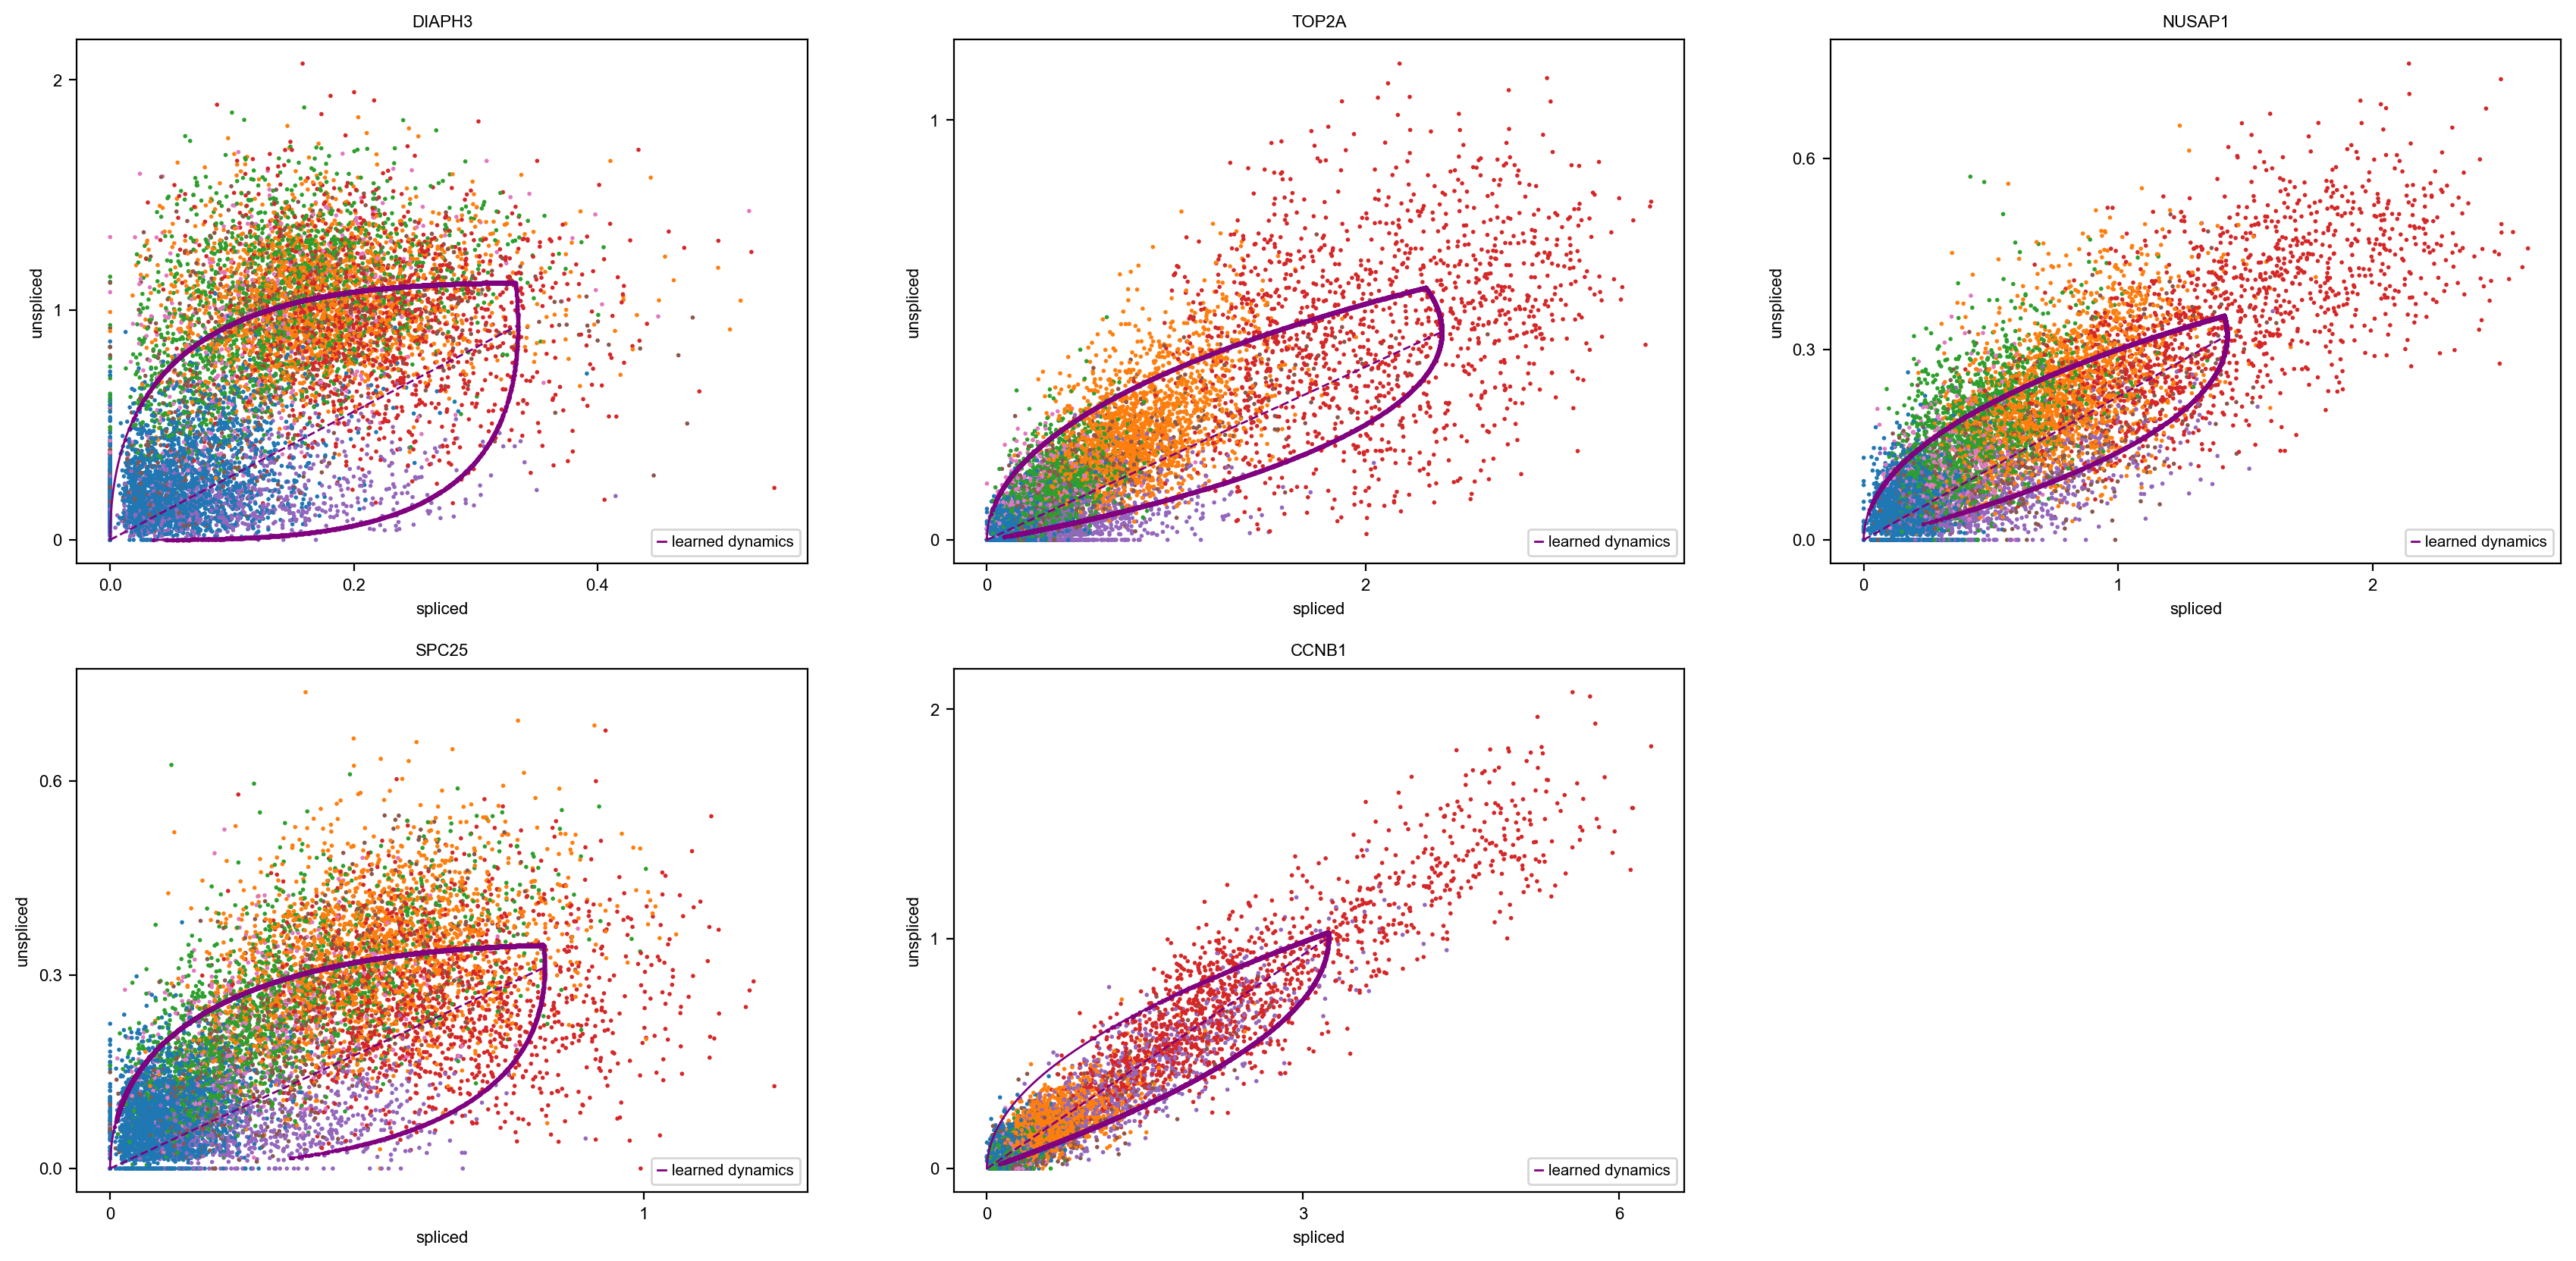

In [8]:
top_genes = adata.var_names[adata.var.fit_likelihood.argsort()[::-1]]
scv.pl.scatter(adata, basis=top_genes[:5], ncols=3, color='louvain')

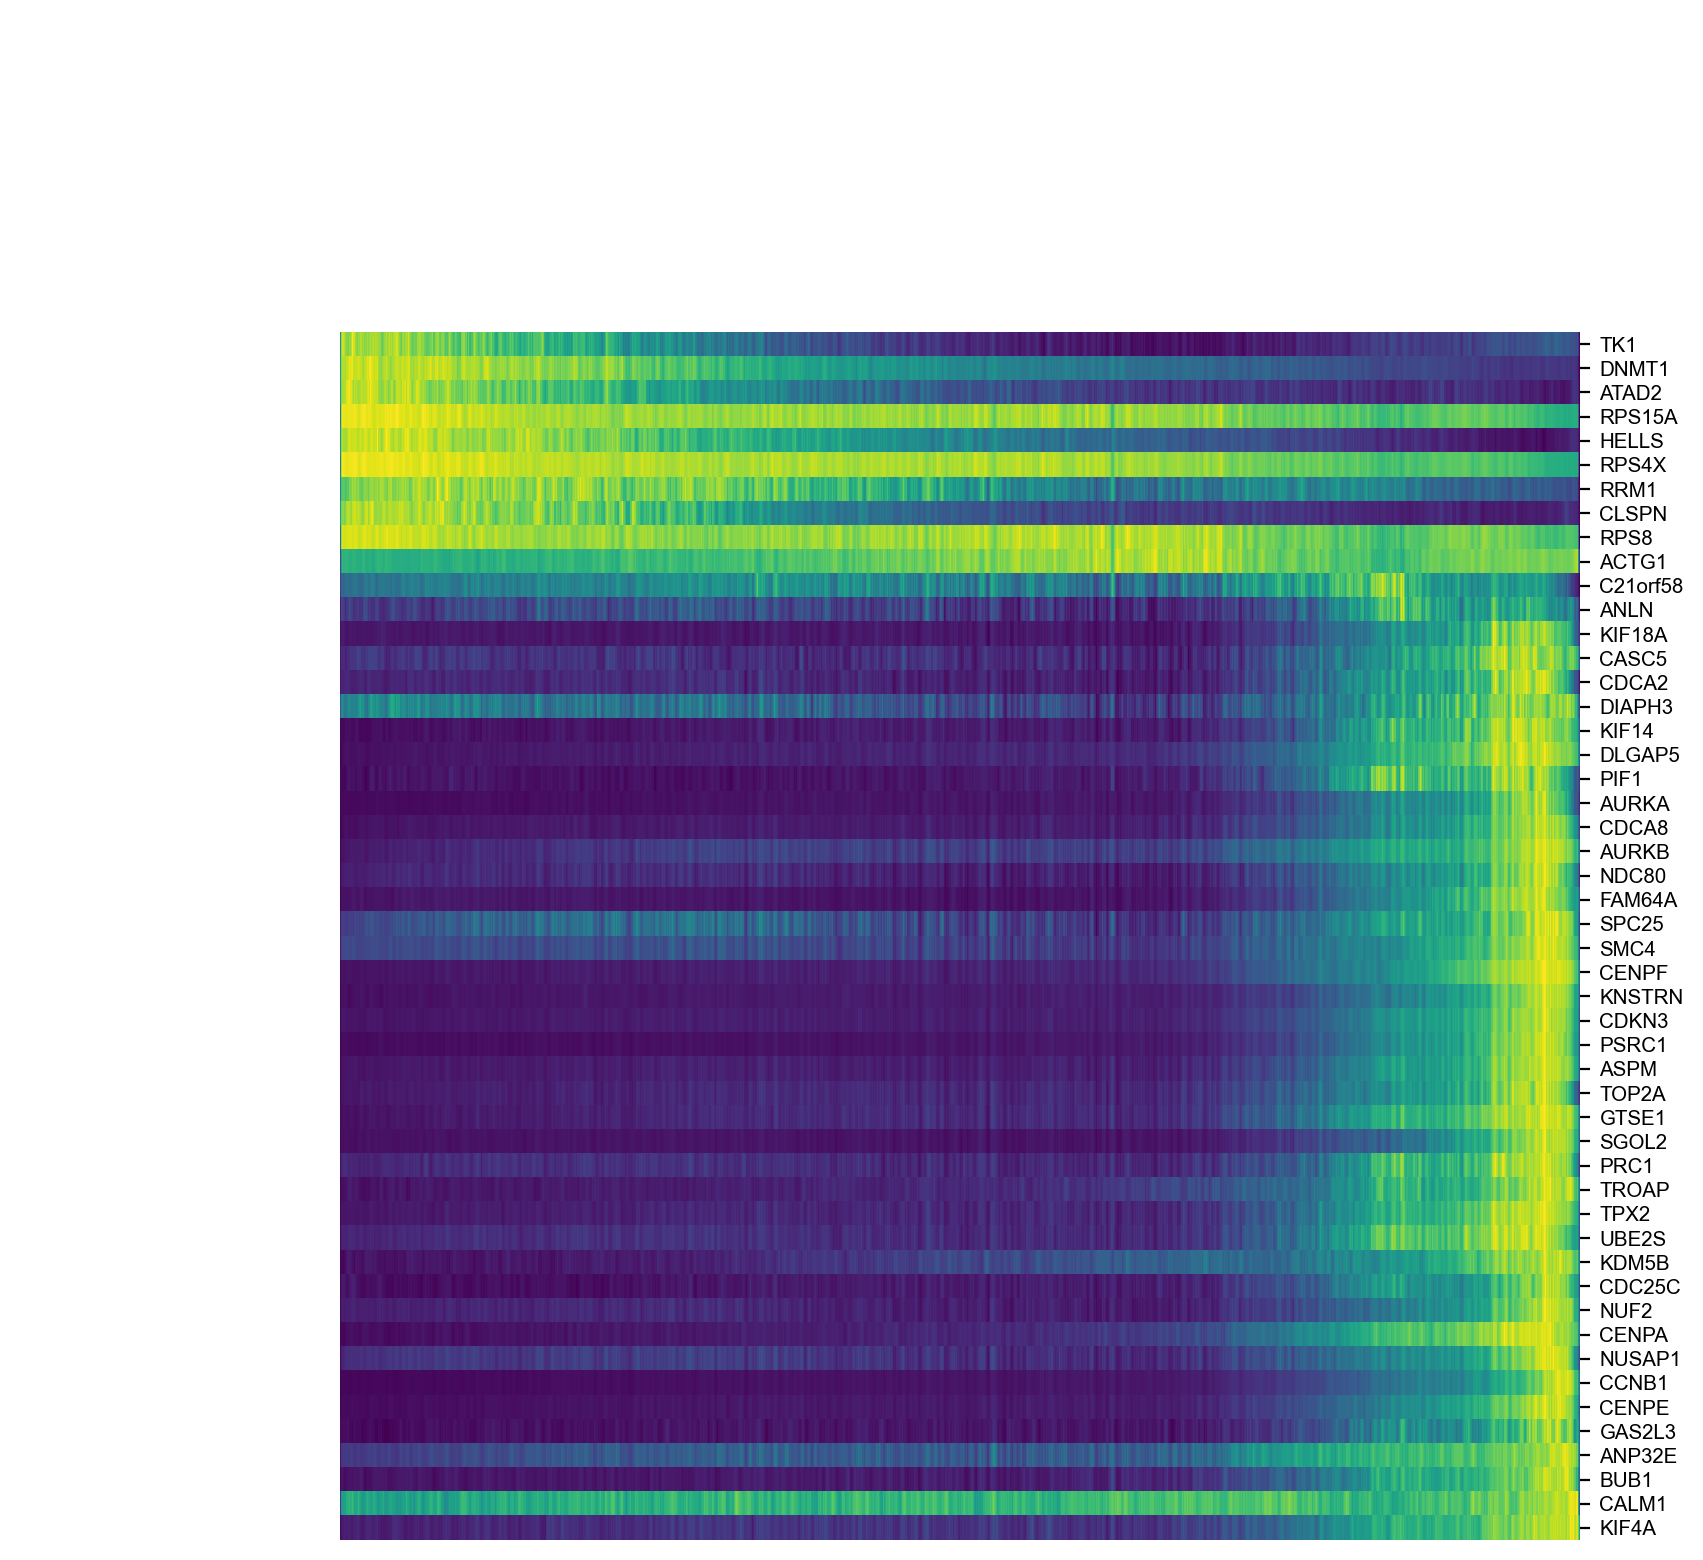

In [31]:
scv.pl.heatmap(adata, var_names=list(top_genes[:50]), tkey='latent_time', figsize=(10, 10))

In [35]:
adata.var['velocity_genes'].sum()

580

In [34]:
adata = sc.read_h5ad('../results/velocity_dynamical/MAST139_velocity.h5ad')

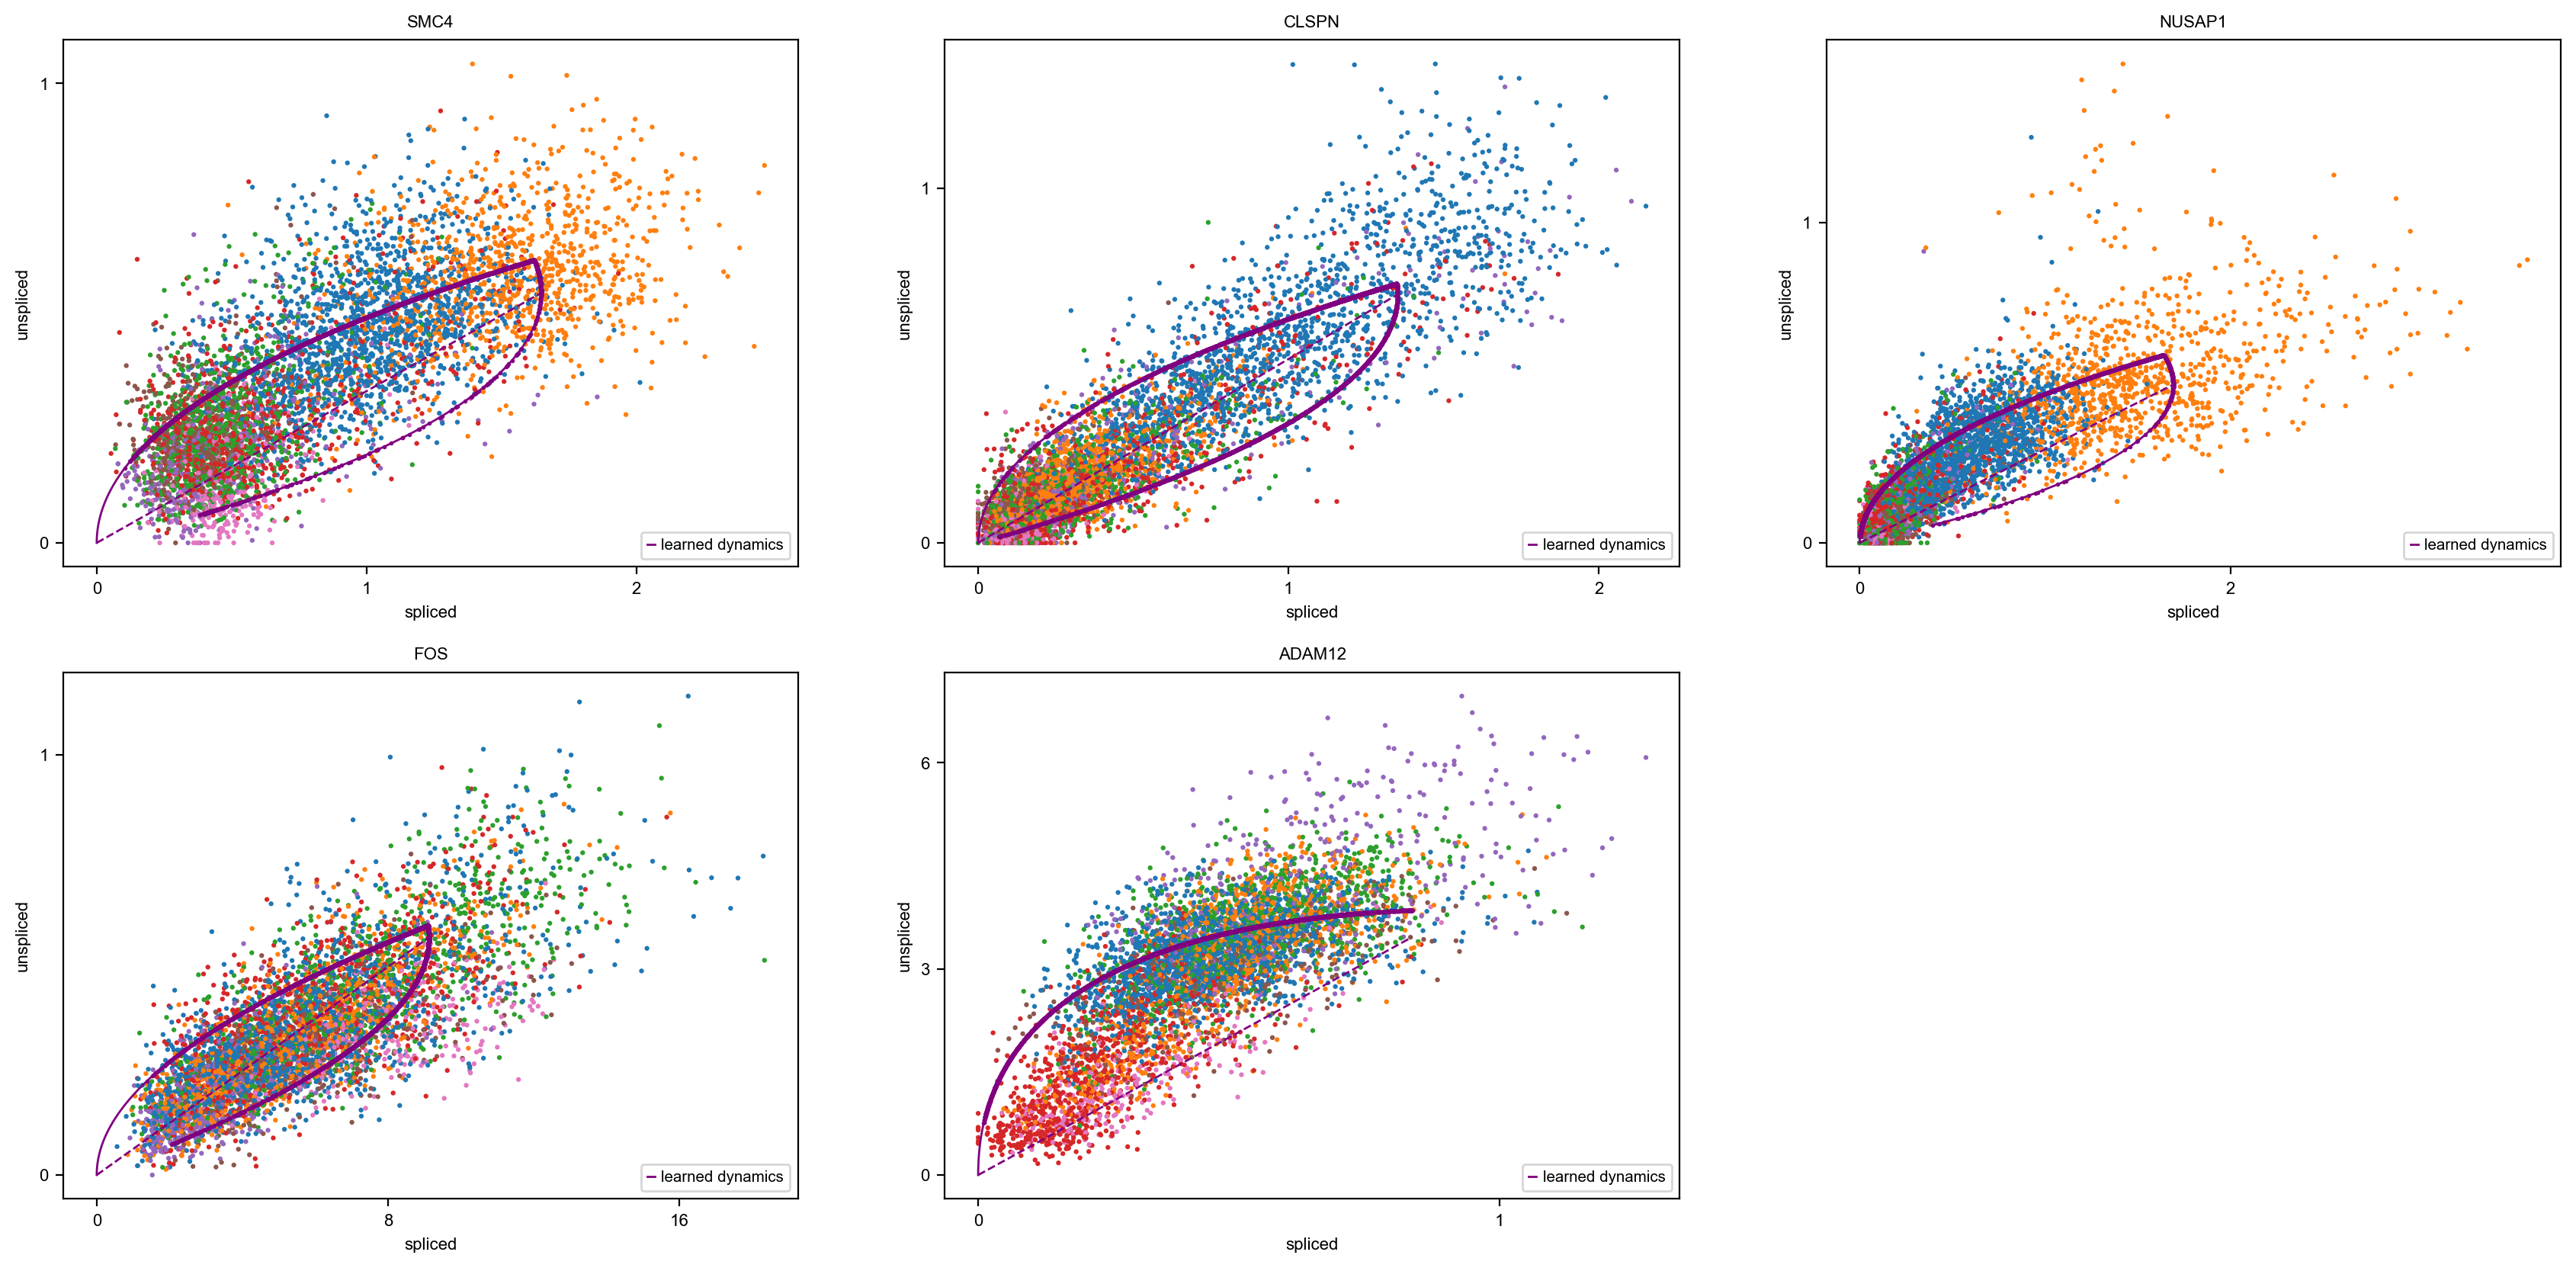

580

In [36]:
top_genes = adata.var_names[adata.var.fit_likelihood.argsort()[::-1]]
scv.pl.scatter(adata, basis=top_genes[:5], ncols=3, color='louvain')
adata.var['velocity_genes'].sum()

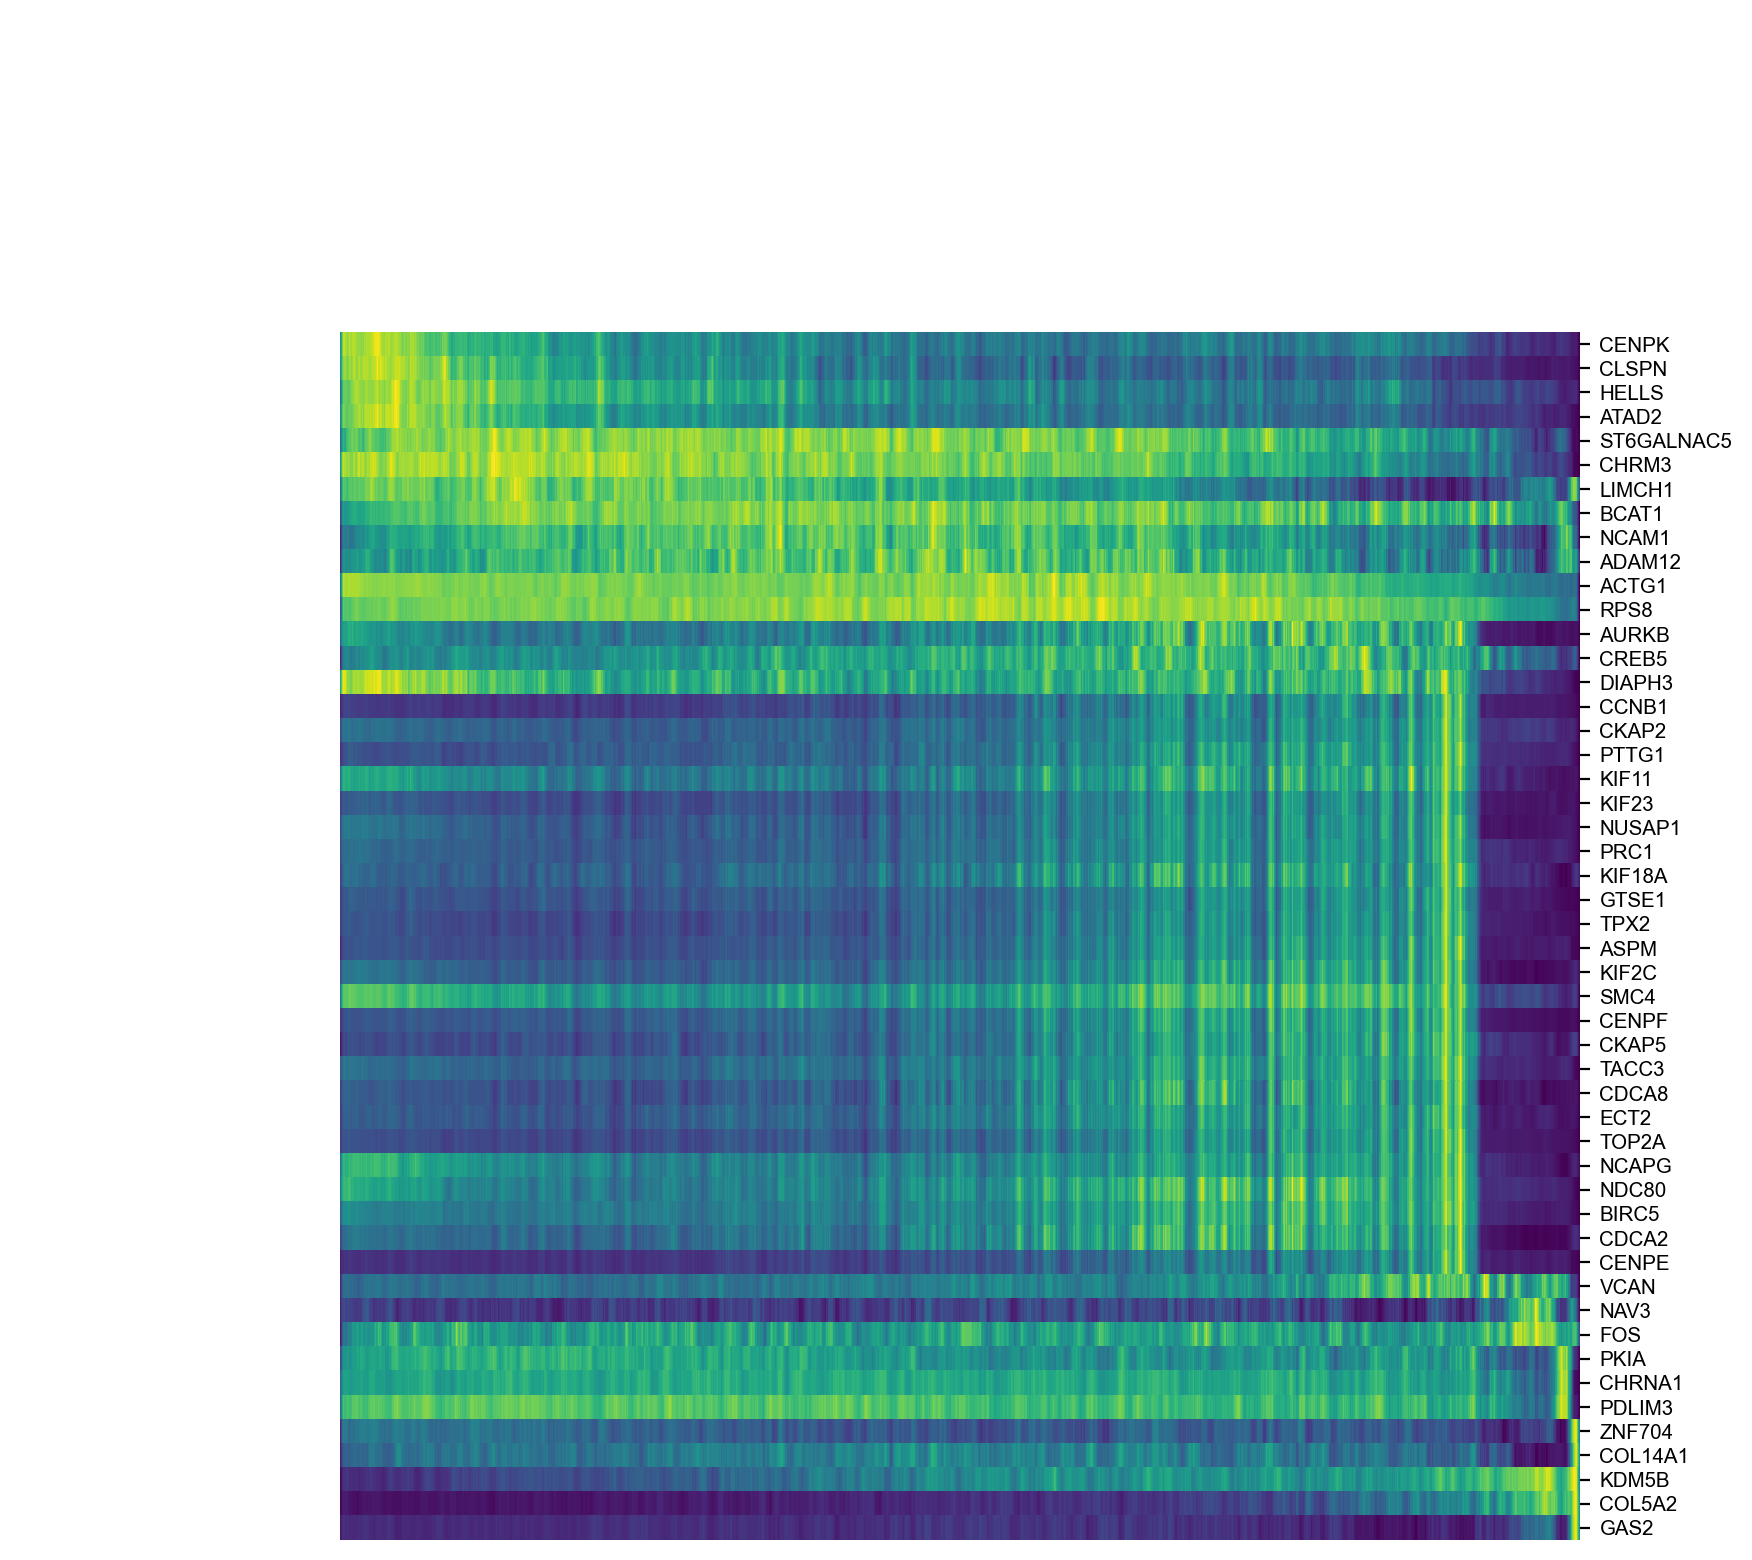

In [37]:
scv.pl.heatmap(adata, var_names=list(top_genes[:50]), tkey='latent_time', figsize=(10, 10))

In [38]:
?scv.pl.heatmap

# Primary tumors

In [51]:
pri1 = sc.read('../results/velocity_dynamical/20696_dynamical_model_velocity.h5ad')
selection = np.load('../results/velocity_dynamical/20696_dynamical_model_velocity.npy')

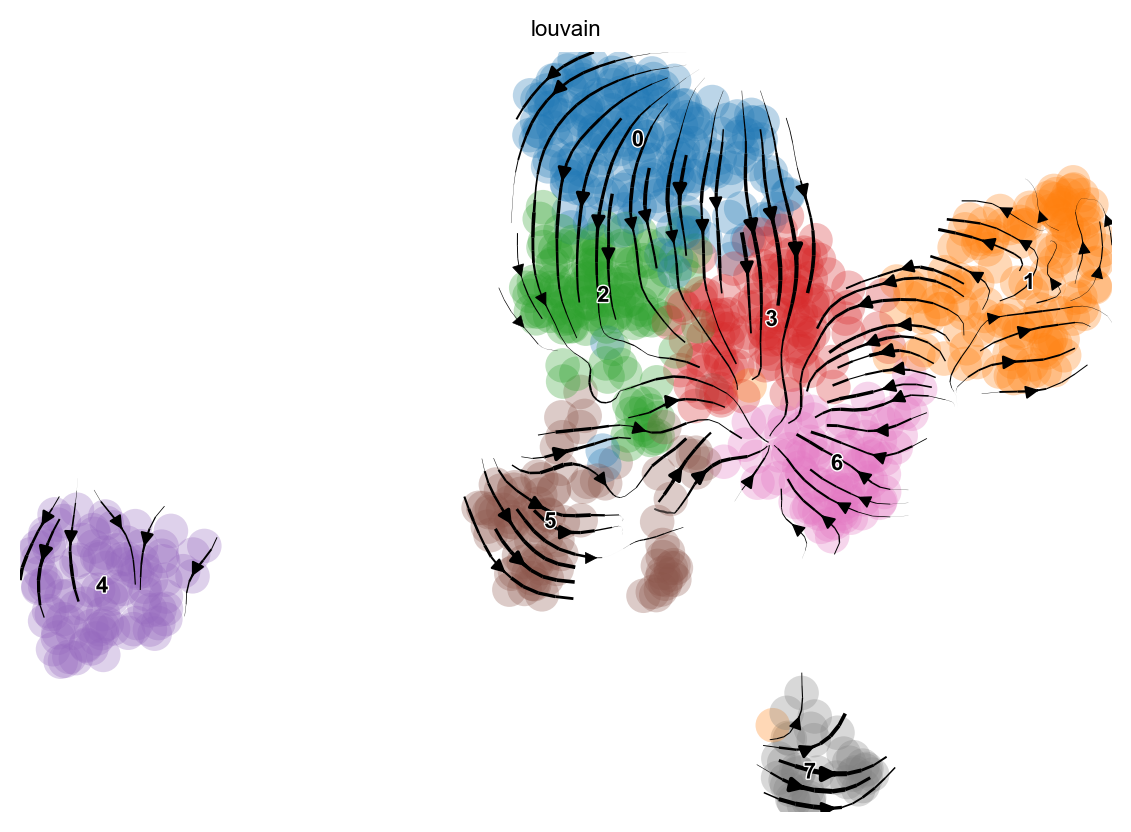

In [52]:
scv.pl.velocity_embedding_stream(pri1)

In [53]:
pri1.obs.loc[:, 'clusters'] = ann.loc[pri1.obs.index, 'Idents(primary1_tumor)']

In [54]:
ann = pd.read_table('20696_primary1_tumor.xls')

In [55]:
ann.iloc[:, 0] = ann.iloc[:, 0].map(lambda x: '20696_hg19:%sx' % x)

In [56]:
ann = ann.set_index('Unnamed: 0')

In [57]:
ann.head()

Idents(primary1_tumor)
Unnamed: 0                                         
20696_hg19:AAACCCAGTATGCTTGx                 GROUND
20696_hg19:AAACCCAGTCATAAAGx                 Muscle
20696_hg19:AAACCCAGTGTCTTAGx                 Muscle
20696_hg19:AAACGAAGTCGGATTTx                 GROUND
20696_hg19:AAACGAATCCTTCTAAx                 GROUND

In [60]:
pri1 = pri1[~pd.isnull(pri1.obs.clusters).values, ]

sc.tl.paga(pri1, groups='clusters')


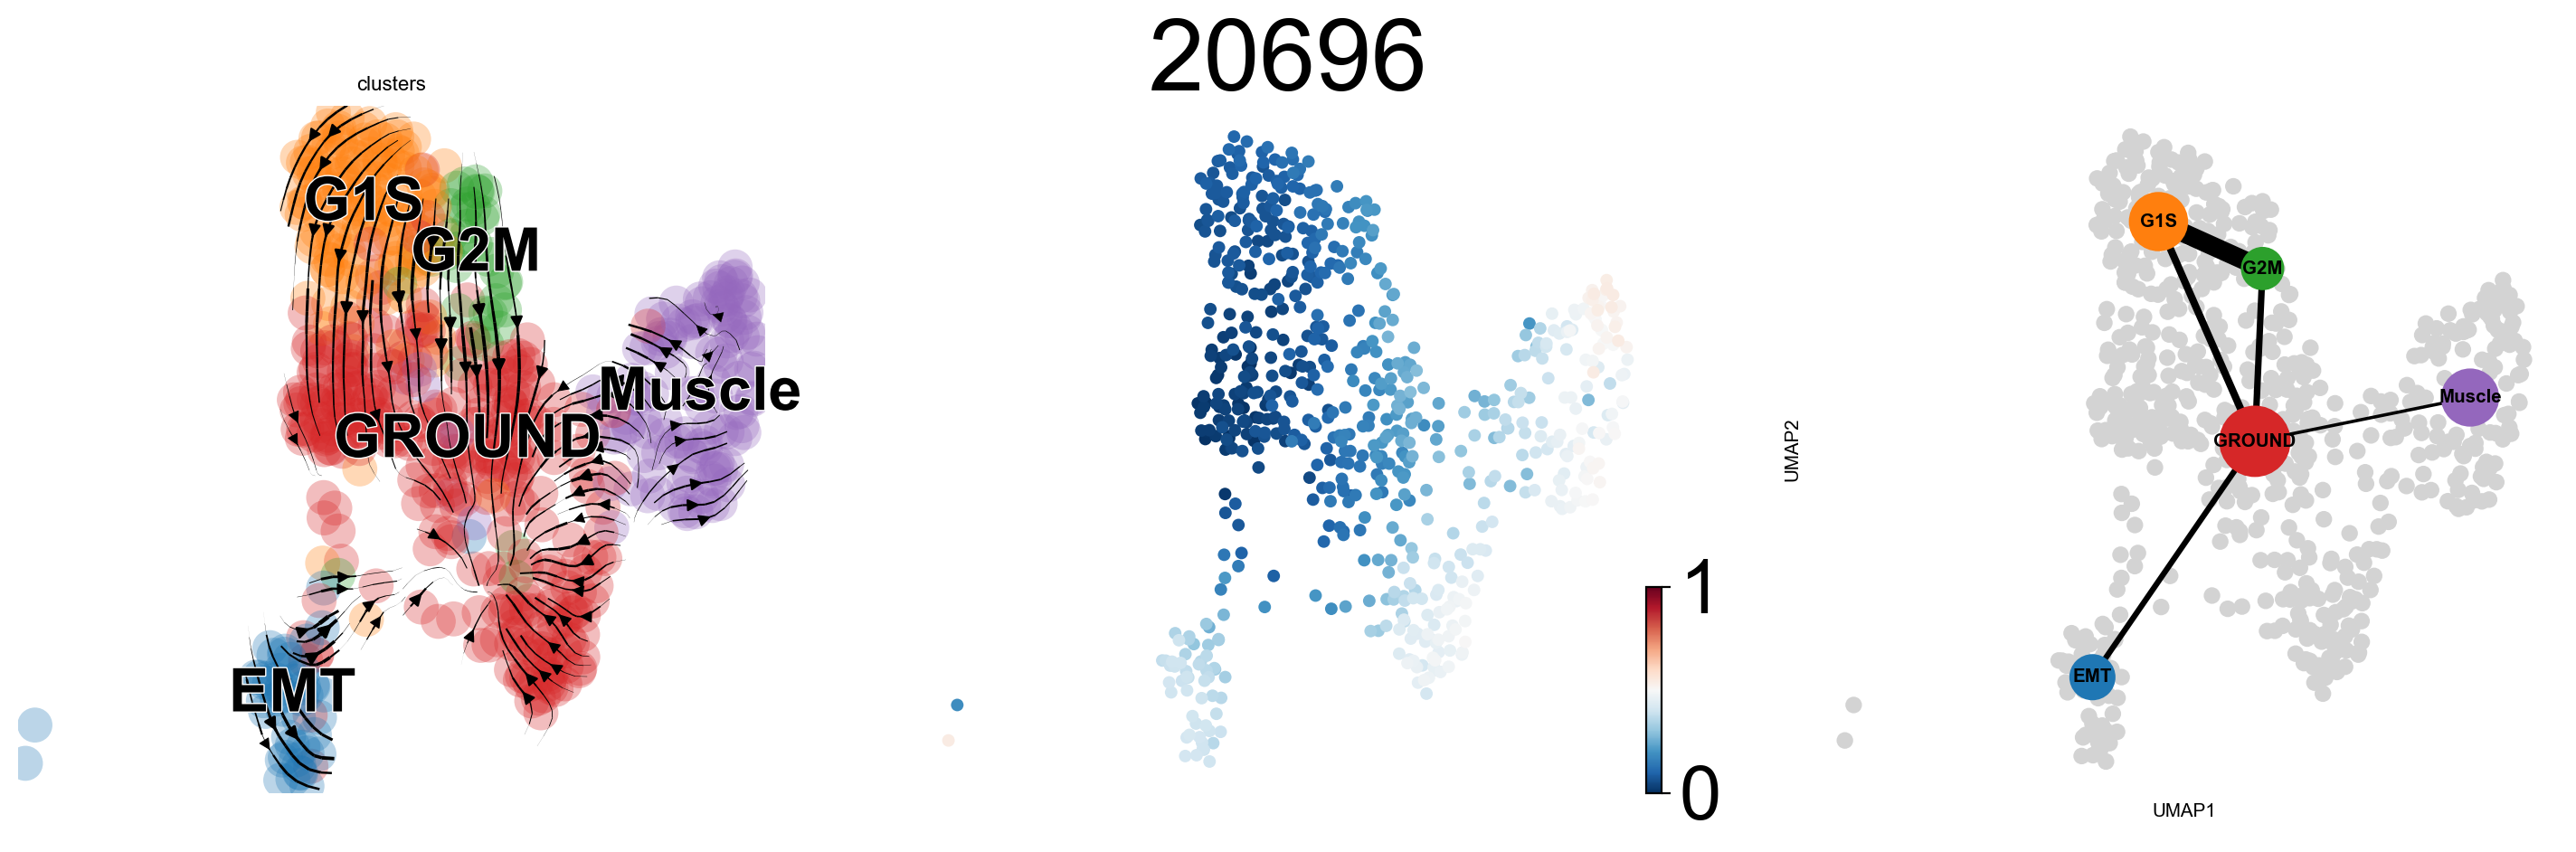

In [95]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18, 5)
scv.pl.velocity_embedding_stream(pri1, color='clusters', ax=ax[0], show=False, 
                                 legend_fontsize=24)
scv.pl.scatter(pri1, basis='umap', color=['latent_time'], title='20696',
               size=100, legend_fontsize=40, fontsize=40,        
               vmin=0, vmax=1.0, ax=ax[1],
               show=False)
paga_compare(pri1, title='', legend_loc='none', threshold=0.1, # 0.2 
             right_margin=0.2, size=20, edge_width_scale=1, basis='umap',
             legend_fontsize=None, frameon=False, show=False, ax=ax[2])
plt.savefig('20696_velocity_paga.png')

In [ ]:
sc.pl.paga(pri1, color='clusters', threshold=0.2)